In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
import itertools

plt.rcParams["xtick.major.size"] = 9
plt.rcParams["xtick.major.width"] = 1.5
plt.rcParams["ytick.major.size"] = 9
plt.rcParams["ytick.major.width"] = 1.5
plt.rcParams["font.size"] = 14

VSUN = np.array([11.1, 12.24, 7.25]) # Hallat & Wiegert (2020)
nu, nv, nw = 100, 100, 100
sr = 100.

pi = np.pi
OUMUAMUA_COORDS = [np.radians(279.804-360.), np.radians(33.997)] # Mamajek (2017)

# M dwarfs

In [2]:
s1, s2, s3 = 31., 23., 16.    # Binney & Merrifield (1998)
vd = np.radians(7.)

In [3]:
def ga2equ(ga):
    pole_ra = np.radians(192.859508)
    pole_dec = np.radians(27.128336)
    posangle = np.radians(122.932-90.)
    
    ra = np.arctan2(np.cos(ga[1])*np.cos(ga[0]-posangle), \
                    np.sin(ga[1])*np.cos(pole_dec) - np.cos(ga[1])*np.sin(pole_dec)*np.sin(ga[0]-posangle)) + pole_ra
    dec = np.arcsin(np.cos(ga[1])*np.cos(pole_dec)*np.sin(ga[0]-posangle) + np.sin(ga[1])*np.sin(pole_dec))
    
    if ra > pi:
        ra = ra - 2*pi
    
    return np.array([ra, dec])

def get_prob(vgal, dv, s1, s2, s3, vd):
    vLSR = vgal + VSUN
    v = np.array([vLSR[0]*np.cos(vd) + vLSR[1]*np.sin(vd), -vLSR[0]*np.sin(vd) + vLSR[1]*np.cos(vd), vLSR[2]])
    
    return 1./8.*(erf((v[0]+dv[0])/(np.sqrt(2)*s1)) - erf((v[0]-dv[0])/(np.sqrt(2)*s1)))* \
           (erf((v[1]+dv[1])/(np.sqrt(2)*s2)) - erf((v[1]-dv[1])/(np.sqrt(2)*s2)))* \
           (erf((v[2]+dv[2])/(np.sqrt(2)*s3)) - erf((v[2]-dv[2])/(np.sqrt(2)*s3)))

def galacticV_to_ra_dec(vel):
    vel = -np.array(vel)
    l = np.arctan2(vel[1], vel[0])
    b = np.arctan2(vel[2], np.sqrt(vel[0]**2 + vel[1]**2))
    return ga2equ([l, b])

def prob_weight(vel, phi):
    return 1. + (42./(np.linalg.norm(vel) + phi))**2

In [4]:
ug = np.linspace(-sr, sr+1., nu)
vg = np.linspace(-sr, sr+1., nv)
wg = np.linspace(-sr, sr+1., nw)

vgal = np.array(list(itertools.product(ug, vg, wg)))
print(vgal.shape)

(1000000, 3)


In [5]:
prob = np.zeros(nu*nv*nw)
unfocused_prob = np.zeros_like(prob)
skyra = np.zeros_like(prob)
skydec = np.zeros_like(prob)
    
for i, v in enumerate(vgal):
    if i % 100000 == 0:
        print(i)
    coords = galacticV_to_ra_dec(v)
    skyra[i] = coords[0]
    skydec[i] = coords[1]
    prob[i] = prob_weight(v, 2.)*get_prob(v, [sr/nu, sr/nv, sr/nw], s1, s2, s3, vd)
    unfocused_prob[i] = get_prob(v, [sr/nu, sr/nv, sr/nw], s1, s2, s3, vd)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


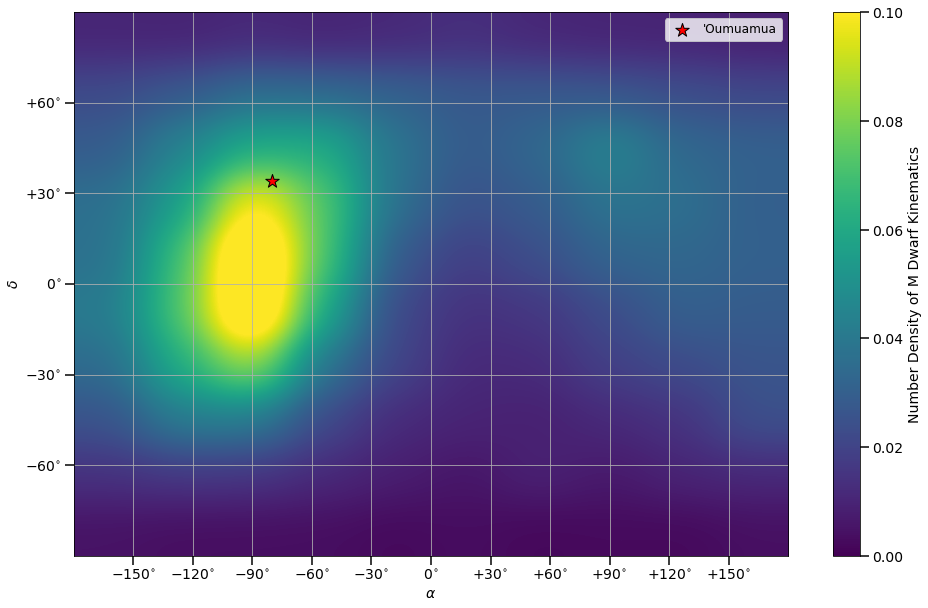

In [6]:
plt.figure(figsize=(16, 10))

h, xedges, yedges = np.histogram2d(skyra, skydec, bins=10, \
    weights=prob)
ax = plt.imshow(h.transpose()[::-1], interpolation='gaussian', \
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], \
    cmap='viridis', aspect='auto', vmin=0., vmax=0.1)

plt.xlabel(r'$\alpha$')
plt.xticks([-5*pi/6, -2*pi/3, -pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6], [ \
        r'$-150^{\circ}$', r'$-120^{\circ}$', r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', r'$0^{\circ}$', \
        r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$', r'$+120^{\circ}$', r'$+150^{\circ}$'])
      
plt.ylabel(r'$\delta$')
plt.yticks([-pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2], [r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', r'$0^{\circ}$', \
        r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$'])

plt.grid(True)

plt.scatter(OUMUAMUA_COORDS[0], OUMUAMUA_COORDS[1], c='red', edgecolor='k', s=200., marker='*', label="'Oumuamua")
plt.legend(loc='upper right', fontsize=12)
plt.colorbar(ax, label='Number Density of M Dwarf Kinematics')

plt.savefig('figures/M_dist.pdf', bbox_inches='tight', \
                    dpi=250)
plt.show()

# G dwarfs

In [7]:
s1, s2, s3 = 26., 18., 15.    # Binney & Merrifield (1998)
vd = np.radians(12.)

In [8]:
ug = np.linspace(-sr, sr+1., nu)
vg = np.linspace(-sr, sr+1., nv)
wg = np.linspace(-sr, sr+1., nw)

vgal = np.array(list(itertools.product(ug, vg, wg)))
print(vgal.shape)

(1000000, 3)


In [9]:
prob = np.zeros(nu*nv*nw)
unfocused_prob = np.zeros_like(prob)
skyra = np.zeros_like(prob)
skydec = np.zeros_like(prob)
    
for i, v in enumerate(vgal):
    if i % 100000 == 0:
        print(i)
    coords = galacticV_to_ra_dec(v)
    skyra[i] = coords[0]
    skydec[i] = coords[1]
    prob[i] = prob_weight(v, 2.)*get_prob(v, [sr/nu, sr/nv, sr/nw], s1, s2, s3, vd)
    unfocused_prob[i] = get_prob(v, [sr/nu, sr/nv, sr/nw], s1, s2, s3, vd)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


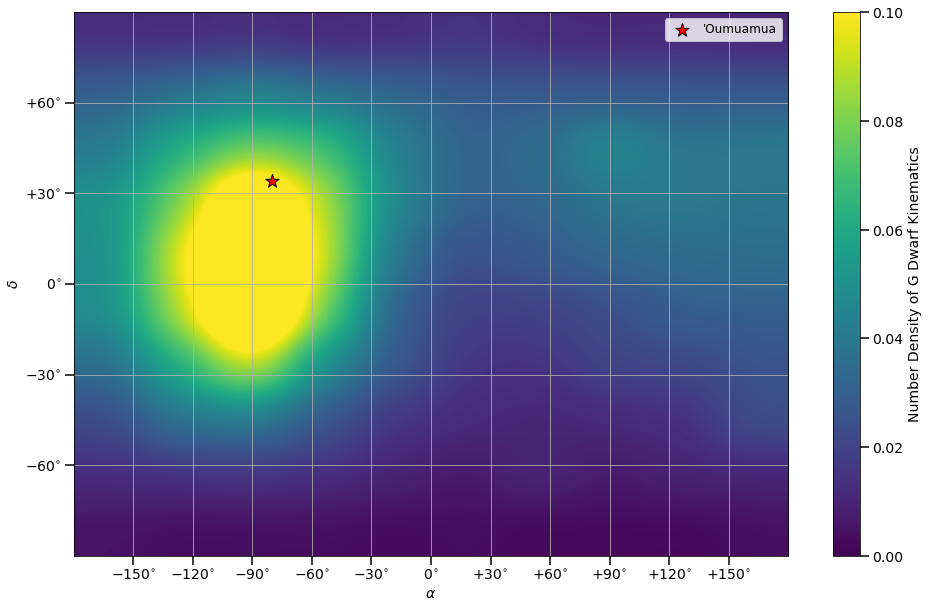

In [10]:
plt.figure(figsize=(16, 10))

h, xedges, yedges = np.histogram2d(skyra, skydec, bins=10, \
    weights=prob)
ax = plt.imshow(h.transpose()[::-1], interpolation='gaussian', \
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], \
    cmap='viridis', aspect='auto', vmin=0., vmax=0.1)

plt.xlabel(r'$\alpha$')
plt.xticks([-5*pi/6, -2*pi/3, -pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6], [ \
        r'$-150^{\circ}$', r'$-120^{\circ}$', r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', r'$0^{\circ}$', \
        r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$', r'$+120^{\circ}$', r'$+150^{\circ}$'])
      
plt.ylabel(r'$\delta$')
plt.yticks([-pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2], [r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', r'$0^{\circ}$', \
        r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$'])

plt.grid(True)

plt.scatter(OUMUAMUA_COORDS[0], OUMUAMUA_COORDS[1], c='red', edgecolor='k', s=200., marker='*', label="'Oumuamua")
plt.legend(loc='upper right', fontsize=12)
plt.colorbar(ax, label='Number Density of G Dwarf Kinematics')
plt.savefig('figures/G_dist.pdf', bbox_inches='tight', \
                    dpi=250)

plt.show()

# O/B giants

In [11]:
s1, s2, s3 = 12., 11., 9.    # Binney & Merrifield (1998)
vd = np.radians(36.)

In [12]:
ug = np.linspace(-sr, sr+1., nu)
vg = np.linspace(-sr, sr+1., nv)
wg = np.linspace(-sr, sr+1., nw)

vgal = np.array(list(itertools.product(ug, vg, wg)))
print(vgal.shape)

(1000000, 3)


In [13]:
prob = np.zeros(nu*nv*nw)
unfocused_prob = np.zeros_like(prob)
skyra = np.zeros_like(prob)
skydec = np.zeros_like(prob)
    
for i, v in enumerate(vgal):
    if i % 100000 == 0:
        print(i)
    coords = galacticV_to_ra_dec(v)
    skyra[i] = coords[0]
    skydec[i] = coords[1]
    prob[i] = prob_weight(v, 2.)*get_prob(v, [sr/nu, sr/nv, sr/nw], s1, s2, s3, vd)
    unfocused_prob[i] = get_prob(v, [sr/nu, sr/nv, sr/nw], s1, s2, s3, vd)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


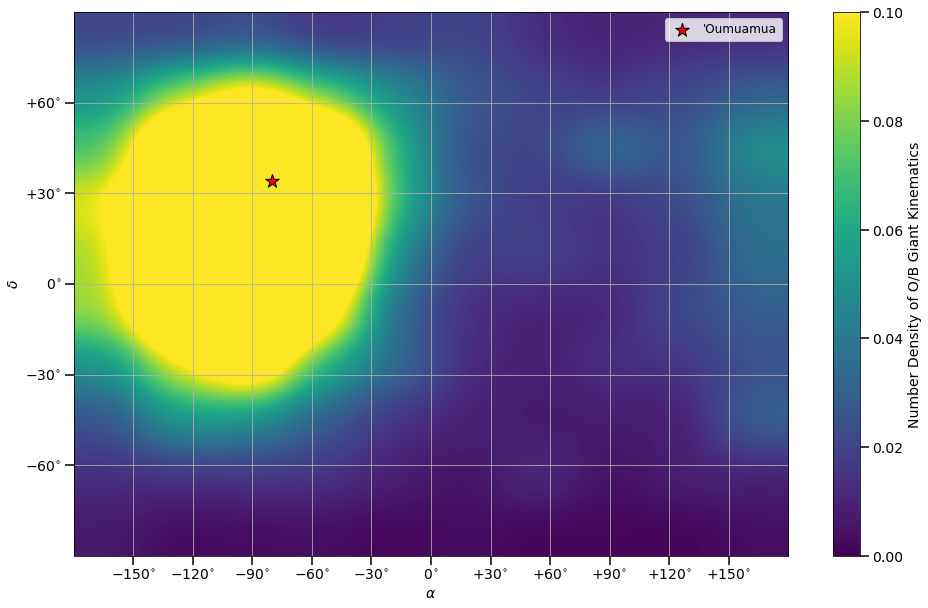

In [14]:
plt.figure(figsize=(16, 10))

h, xedges, yedges = np.histogram2d(skyra, skydec, bins=10, \
    weights=prob)
ax = plt.imshow(h.transpose()[::-1], interpolation='gaussian', \
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], \
    cmap='viridis', aspect='auto', vmin=0., vmax=0.1)

plt.xlabel(r'$\alpha$')
plt.xticks([-5*pi/6, -2*pi/3, -pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6], [ \
        r'$-150^{\circ}$', r'$-120^{\circ}$', r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', r'$0^{\circ}$', \
        r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$', r'$+120^{\circ}$', r'$+150^{\circ}$'])
      
plt.ylabel(r'$\delta$')
plt.yticks([-pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2], [r'$-90^{\circ}$', r'$-60^{\circ}$', r'$-30^{\circ}$', r'$0^{\circ}$', \
        r'$+30^{\circ}$', r'$+60^{\circ}$', r'$+90^{\circ}$'])

plt.grid(True)

plt.scatter(OUMUAMUA_COORDS[0], OUMUAMUA_COORDS[1], c='red', edgecolor='k', s=200., marker='*', label="'Oumuamua")
plt.legend(loc='upper right', fontsize=12)
plt.colorbar(ax, label='Number Density of O/B Giant Kinematics')
plt.savefig('figures/OB_dist.pdf', bbox_inches='tight', \
                    dpi=250)

plt.show()